# Project Overview

#### Problem Statement: 

Given a dataset containing various residential property features, the challenge is to develop a predictive model that accurately estimates house sale prices, aiding buyers, sellers, and real estate professionals in making informed decisions.


#### Objective: 
To build and evaluate a predictive model for house prices using advanced regression techniques, ensuring high accuracy and reliability in estimating property values based on key features.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
# importing the test dataset

unlabelled_data = pd.read_csv('test.csv')

In [4]:
# Importing the train data and printing the first 5 rows

data = pd.read_csv('train.csv')

data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
data.shape

(1460, 81)

In [6]:
# checking for null values and data type format in the data 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Descriptive statistics of the data

data.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     91     1460        1460      1460  ...  1460.000000      7    281   
unique     2        4           4         2  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      50      925        1311      1459  ...          NaN      3    157   
mean     NaN      NaN         NaN       NaN  ...     2.758904    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    40.177307    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           54   1460.000000  1460.000000  1460.000000      1460   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            49           NaN          NaN          NaN      1267   
mean           NaN     43.489041     6.321918  2007.815753       NaN   
std            NaN    496.123024     2.703626     1.328095       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1460    1460.000000  
unique              6            NaN  
top            Normal            NaN  
freq             1198            NaN  
mean              NaN  180921.195890  
std               NaN   79442.502883  
min               NaN   34900.000000  
25%               NaN  129975.000000  
50%               NaN  163000.000000  
75%               NaN  214000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

In [8]:
# checking for null values in each column

data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

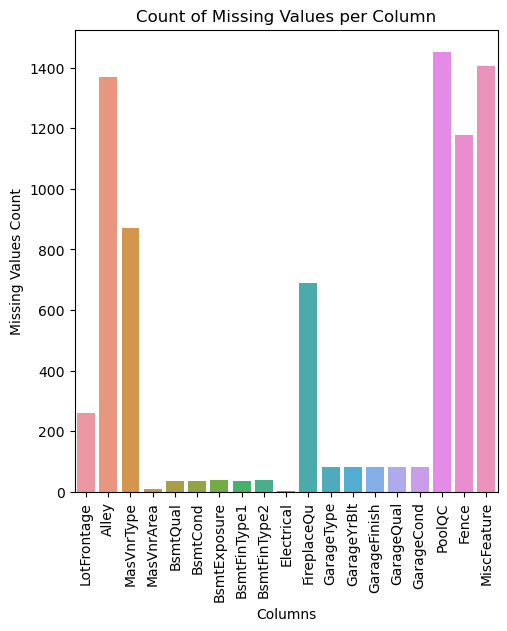

In [9]:
# Distribution of missing values in the dataset

df = data[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Electrical', 'FireplaceQu','GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']]

missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Combine into a single dataframe for easier plotting
missing_data = pd.DataFrame({'Count': missing_counts, 'Percentage': missing_percent})

# Step 3: Visualize Missing Values
plt.figure(figsize=(12, 6))

# Plot count of missing values
plt.subplot(1, 2, 1)
sns.barplot(x=missing_data.index, y='Count', data=missing_data)
plt.xticks(rotation = 90)
plt.title('Count of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.show()

### There are 19 columns with missing values with PoolQC having the highest number of missing values

In [10]:
# Handling missing values.The missing values was handled using a function that checks the data type of each column, if the data 
# type is an object, it fills it with Nil and if its an integer or float, it fills it with 0. The missing values might indicates
# that the item of interest is not available for that particular rows

def missing_values(data, columns):
    for column in columns:
        if data[column].dtype == 'O':
            data[column] = data[column].fillna('Nil')
            
        else:
            data[column] = data[column].fillna(0)
            
    return data

In [11]:
# Instantiating the function for both the train and test dataset
data = missing_values(data, data.columns) # for train data

unlabelled_data = missing_values(unlabelled_data, unlabelled_data.columns) # for the test data

In [12]:
# No more missing values
data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [13]:
# checking for duplicates in the dataset

data.duplicated().sum()

0

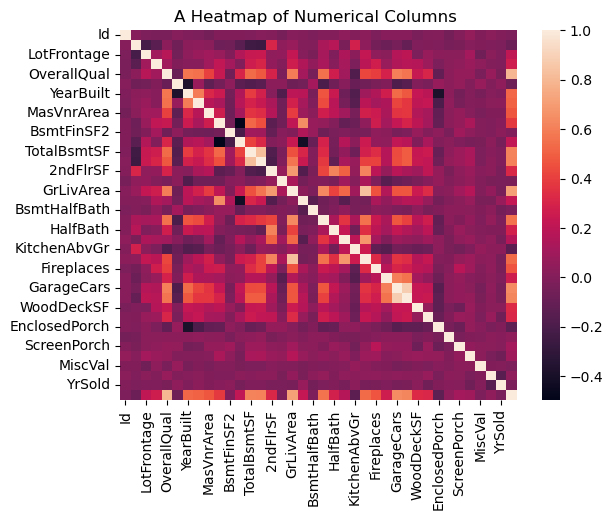

In [14]:
# plot a heatmap showing the relationship between features

numerical_columns = data.select_dtypes(['int', 'float'])
corr = numerical_columns.corr()

sns.heatmap(data= corr)

plt.title("A Heatmap of Numerical Columns ")
plt.show()

### Some are relatively correlated, indicating they might provide similar information, while others are weakly correlated or uncorrelated, suggesting they contribute distinct information to the dataset.

# Identifying Outliers 

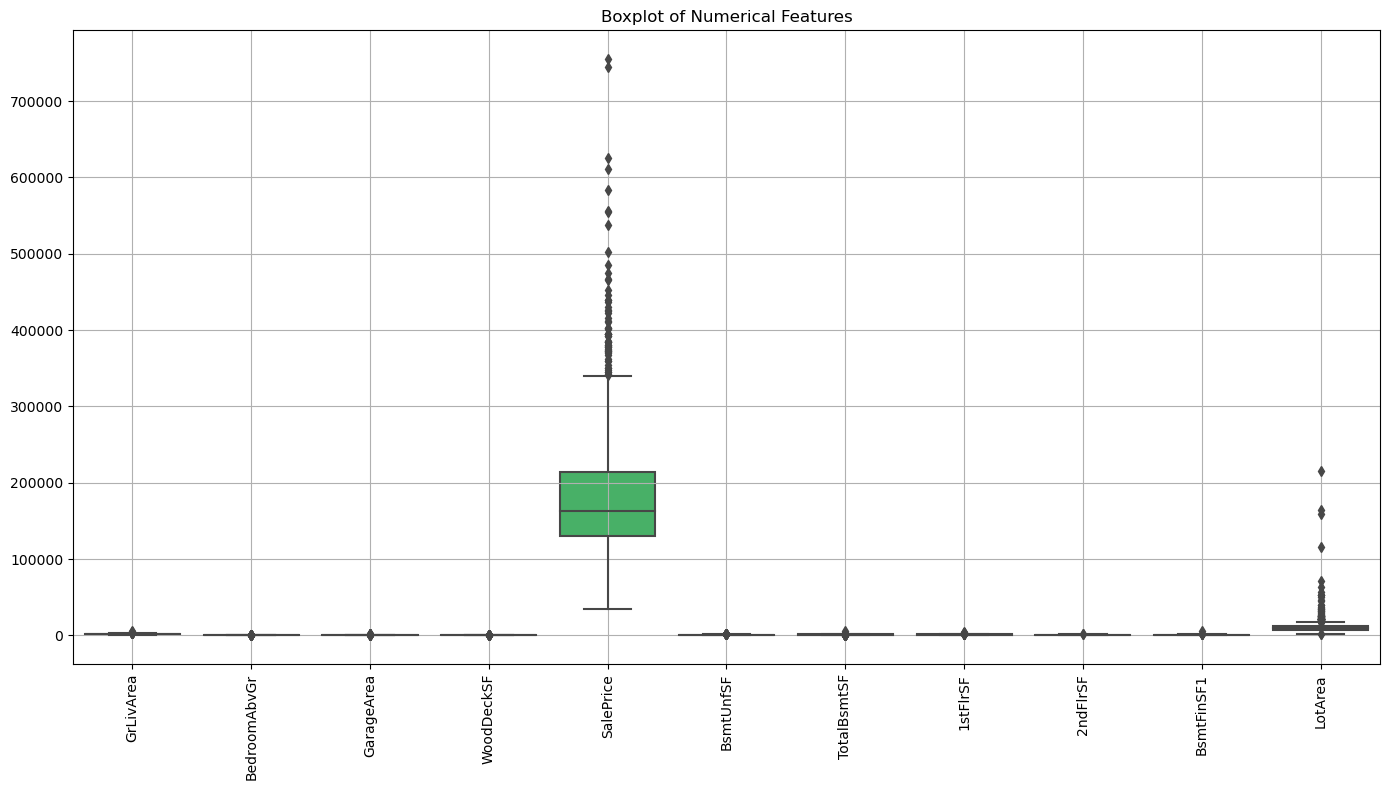

In [15]:
# checking for outliers in the dataset using a boxplot

plt.figure(figsize=(14, 8))
sns.boxplot(data[['GrLivArea', 'BedroomAbvGr', 'GarageArea','WoodDeckSF','SalePrice','BsmtUnfSF','TotalBsmtSF','1stFlrSF', 
                    '2ndFlrSF', 'BsmtFinSF1','LotArea']])
plt.xticks(rotation=90)  
plt.title('Boxplot of Numerical Features')
plt.grid(True)
plt.tight_layout()
plt.show()



In [16]:
# Handling the outliers using IQR and filling them using the clip method
# Clipping involves setting the outliers to a fixed boundary value, either the minimum or maximum acceptable value 
# based on the distribution of the data.

# The idea behind handling outliers through methods like clipping is to mitigate the impact that extreme values can 
# have on statistical analyses and machine learning models. Outliers can skew the results and lead to misleading conclusions. 

    
def clip_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Clip the outliers to the boundary values
        df[col] = np.clip(df[col], lower_bound, upper_bound)


# List of columns to check for outliers
columns_to_check = ['GrLivArea', 'BedroomAbvGr', 'GarageArea','WoodDeckSF','SalePrice','BsmtUnfSF','TotalBsmtSF','1stFlrSF', 
                    '2ndFlrSF', 'BsmtFinSF1','LotArea','LotFrontage']

# Apply the function to both the train and test dataset
clip_outliers(data, columns_to_check) # for train data
clip_outliers(unlabelled_data,  ['GrLivArea', 'BedroomAbvGr', 'GarageArea','WoodDeckSF','BsmtUnfSF','TotalBsmtSF','1stFlrSF', 
                    '2ndFlrSF', 'BsmtFinSF1','LotArea','LotFrontage']) # for test data

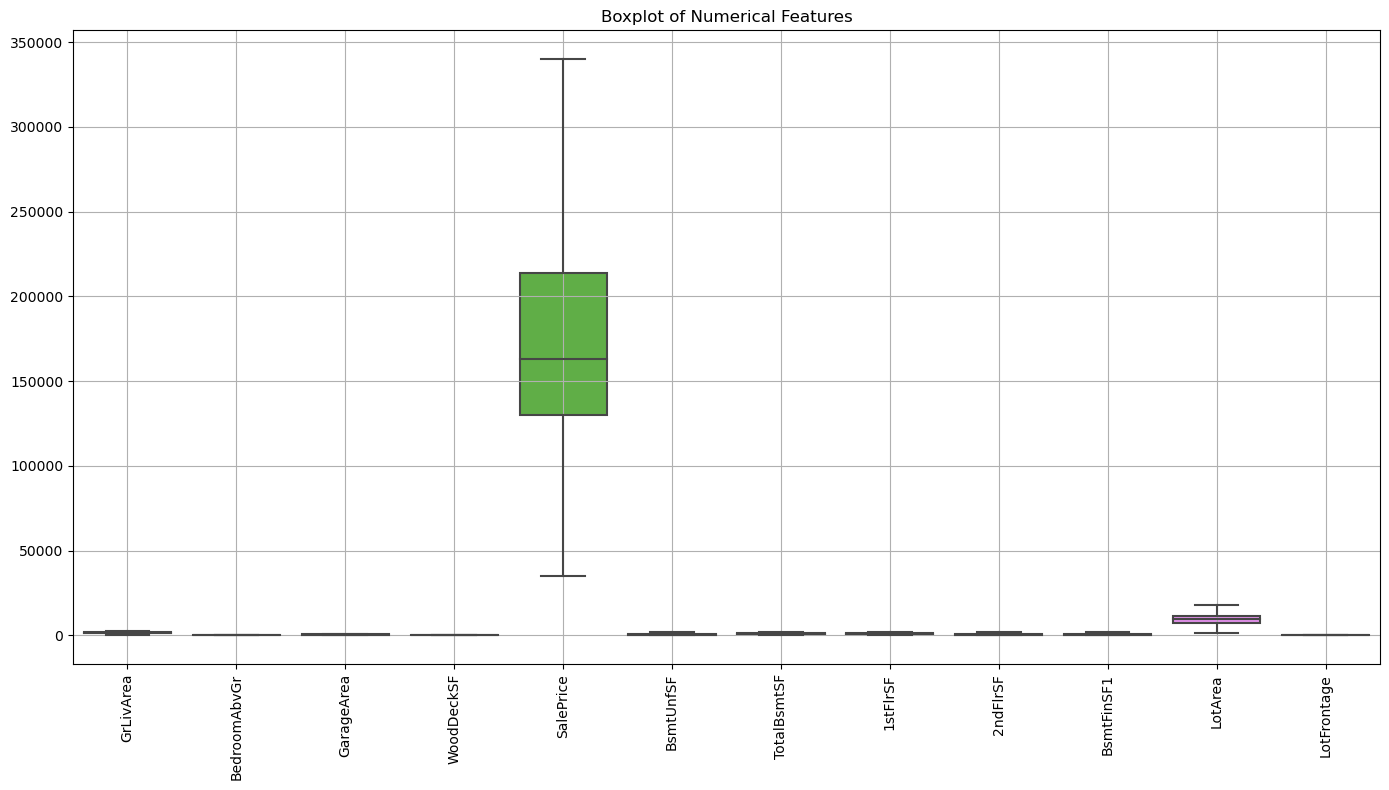

In [17]:
# Checking if the Outliers Handling Worked

plt.figure(figsize=(14, 8))
sns.boxplot(data[['GrLivArea', 'BedroomAbvGr', 'GarageArea','WoodDeckSF','SalePrice','BsmtUnfSF','TotalBsmtSF','1stFlrSF', 
                    '2ndFlrSF', 'BsmtFinSF1','LotArea','LotFrontage']])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Numerical Features')
plt.grid(True)
plt.tight_layout()
plt.show()



# Univariate Analysis 

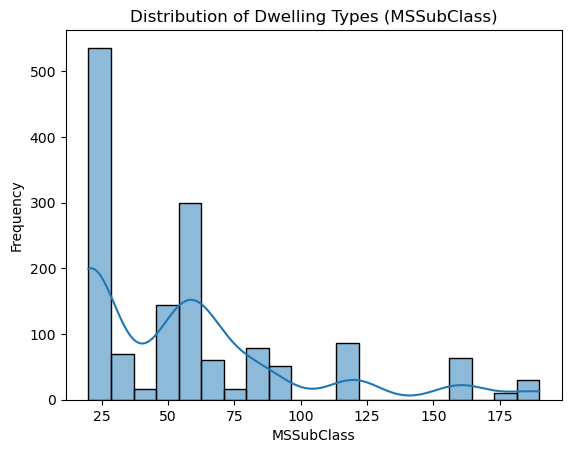

In [18]:
# Plotting the histogram
sns.histplot(data['MSSubClass'], bins=20, kde=True)

# Adding title and labels
plt.title('Distribution of Dwelling Types (MSSubClass)')
plt.xlabel('MSSubClass')
plt.ylabel('Frequency')


# Show the plot
plt.show()


The histogram chat shows the distribution of different dwelling types in a dataset, classified by a code called "MSSubClass." Each bar represents the number of houses in each category, and the height of the bar shows how many houses fall into that category.

20: 1-story, 1946 and newer
30: 1-story, 1945 and older
40: 1-story with attic
50: 1.5-story, finished all
60: 2-story, 1946 and newer
70: 2-story, 1945 and older
75: 2.5-story, all ages
80: Split or multi-level
85: Split foyer
90: Duplex - all styles and ages
120: 1-story PUD (Planned Unit Development) - 1946 and newer
150: 1.5-story PUD - all ages
160: 2-story PUD - 1946 and newer
180: PUD - multilevel - inclined or terrace
190: 2-family conversion - all styles and ages

From the plot, it shows that the 20s dwelling has more properties than the other dwellings.

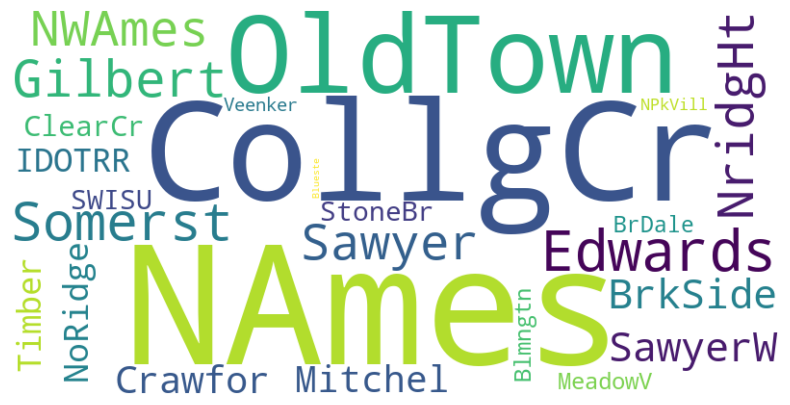

In [19]:
# WordCloud plot of Neighhood features
from wordcloud import WordCloud

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data['Neighborhood']))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



This word cloud shows the frequency of each Neighborhood based on how bold they are. We have the neighborhhod called NAmes, Edwards, OldTown, CollgCr and Gilbert appears to be the most frequent base on their font sizes.

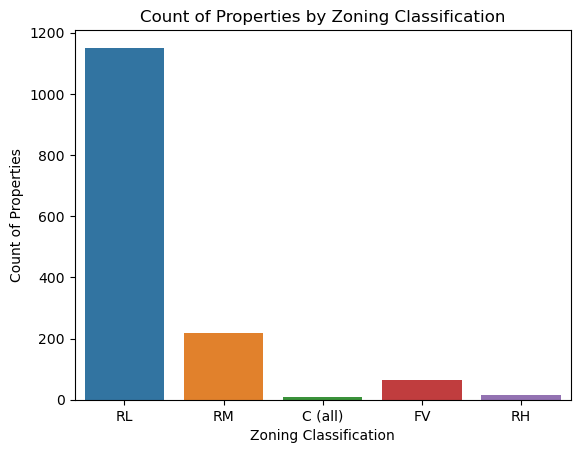

In [20]:
# checking for count of Properties by zoning classification

# Plotting the countplot
sns.countplot(data=data, x='MSZoning')

# Adding title and labels
plt.title('Count of Properties by Zoning Classification')
plt.xlabel('Zoning Classification')
plt.ylabel('Count of Properties')

# Show the plot
plt.show()


MSZoning: Identifies the general zoning classification of each property. The meaning of each classification can be found below:

C: Commercial,
FV: Floating Village Residential, 
RH: Residential High Density, 
RL: Residential Low Density, 
RM: Residential Medium Density

The Residential Low Density zone has more properties.

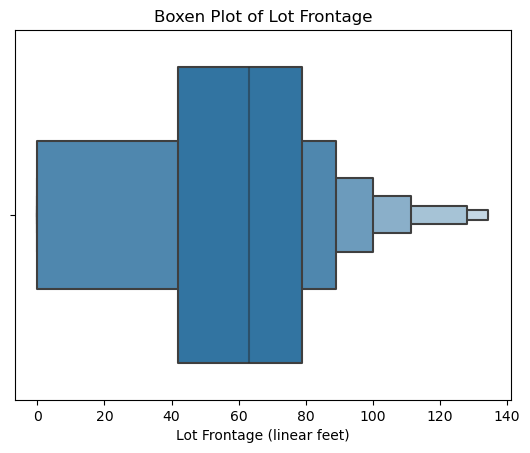

In [21]:
# Plotting the boxen plot of LotFrontage showing the distribution

sns.boxenplot(x=data['LotFrontage'])

# Adding title and labels
plt.title('Boxen Plot of Lot Frontage')
plt.xlabel('Lot Frontage (linear feet)')

# Show the plot
plt.show()


The median Lot Frontage is around 70 linear feet. The majority of the data points lie between 0 and 125 which suggests the typical range for Lot Frontage. 

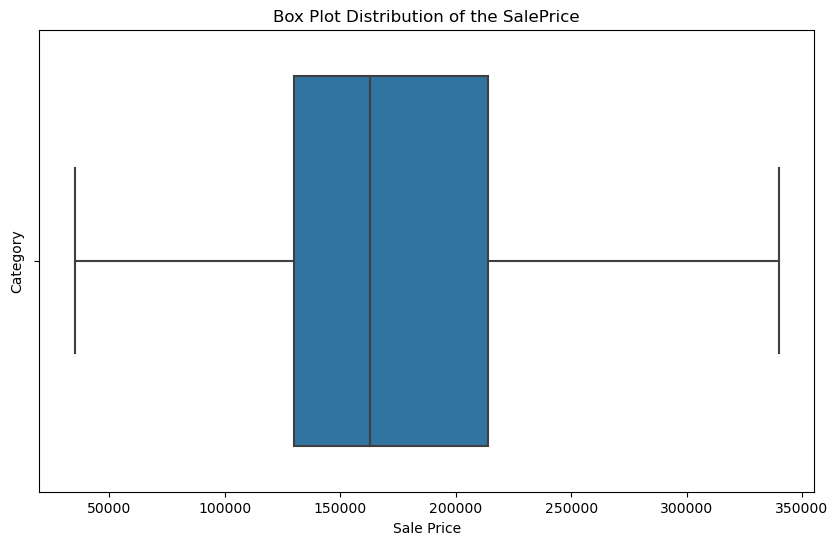

In [22]:
# Plotting the distribution of the sales price using box plot

plt.figure(figsize=(10, 6))
sns.boxplot(x='SalePrice' , data=data)
plt.xlabel('Sale Price')
plt.ylabel('Category')
plt.title('Box Plot Distribution of the SalePrice')
plt.show()


The boxplot shows the distribution of sales price with the minimum price being $34,000, the median been $163,000 and the maximum estimated to be $340,000

# Bivariate Analysis

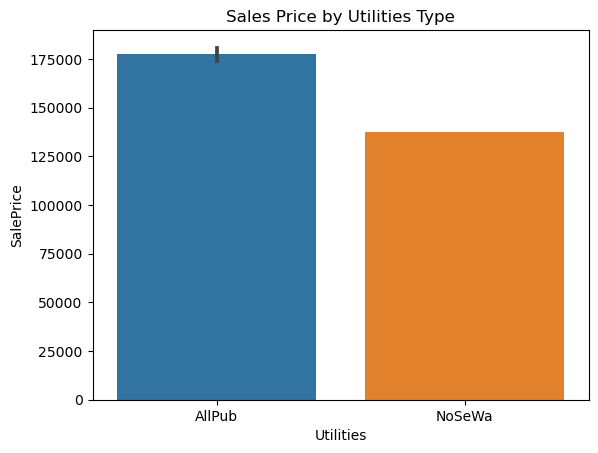

In [23]:
# plotting utilities in respect to the sales price

sns.barplot(data=data, x =data['Utilities'], y=data['SalePrice'])

plt.title('Sales Price by Utilities Type')
plt.show()

AllPub: This stands for "All Public utilities." It means that the property has access to all essential public utilities, which generally include: Public water supply, Public sewer system, Electricity,Gas, Telephone, Internet

NoSeWa: This is shorthand for "No Sewer or Water." It indicates that the property does not have access to public sewer and water services. Instead, the property might need:

A septic system for sewage disposal,

A private well for water supply

Properties with "NoSeWa" utilities are typically found in more rural or underdeveloped areas where public utility infrastructure is not available. Owners of such properties must arrange for private solutions for water and sewage.

Properties with AllPub has higher price compared to properties with NoSewa

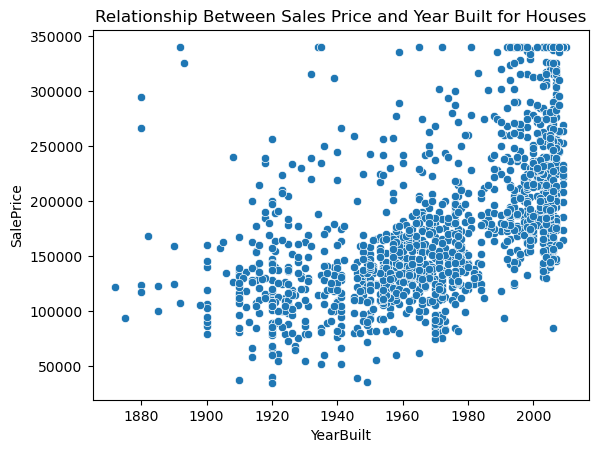

In [24]:
# Checking if there is a relationship between the year the house was built and sales price for the house
sns.scatterplot(data=data, x = data['YearBuilt'], y= data['SalePrice'])


plt.title("Relationship Between Sales Price and Year Built for Houses")
plt.show()

The variability in sale prices increases for houses built in recent years. This suggests that while newer houses can fetch higher prices, there is also a wide range of prices within each time period.
The variability is lower for older houses (before 1940), indicating a more uniform pricing in that period.

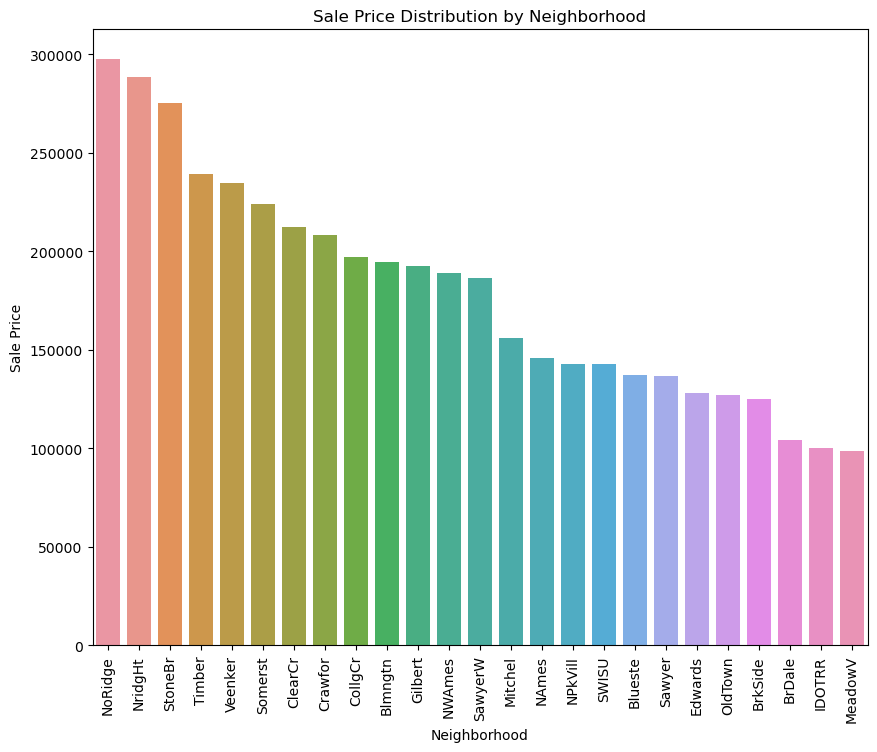

In [25]:
# The idea behind this plot is to visualize the distribution of sale prices across different neighborhoods 
# in a descending order based on the average sales price. This allows for easier comparison between  which neighborhoods tend
# to have higher or lower sale prices.


# Calculate the mean sale price for each neighborhood and sort in descending order
mean_saleprice_by_neighborhood = data.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

# Create a new DataFrame for plotting
sorted_data = data.set_index('Neighborhood').loc[mean_saleprice_by_neighborhood.index].reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='Neighborhood', y='SalePrice', data=sorted_data, estimator=lambda x: sum(x) / len(x), errorbar=None)
plt.title('Sale Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


The 3 Neighborhood with the highest house price are NoRidge, Nridght and StoneBr. The type of neighborhood can also affect the prices of house. The more developed a neighborhood is, the higher the prices of houses.

# Feature Engineering

In [26]:
# Created 5 features from existing columns.From yearsold and yearbuilt, i got the house age.I got remodelage from substracting
# yearsold and yearRemodAdd. I also created totalbath, Haspool, HasFireplace, TotalSF, hasgarage, LotfrontageRatio

# for the train dataset

data['HouseAge'] = data['YrSold'] - data['YearBuilt']
data['RemodelAge'] = data['YrSold'] - data['YearRemodAdd']
data['TotalBath'] = data['FullBath'] + data['HalfBath']*0.5 + data['BsmtFullBath'] + data['BsmtHalfBath']*0.5
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['LotFrontageRatio'] = data['LotFrontage'] / data['LotArea']

In [27]:
# for the unlabelled dataset

unlabelled_data['HouseAge'] = unlabelled_data['YrSold'] - unlabelled_data['YearBuilt']
unlabelled_data['RemodelAge'] = unlabelled_data['YrSold'] - unlabelled_data['YearRemodAdd']
unlabelled_data['TotalBath'] = unlabelled_data['FullBath'] + unlabelled_data['HalfBath']*0.5 + unlabelled_data['BsmtFullBath'] + unlabelled_data['BsmtHalfBath']*0.5
unlabelled_data['TotalSF'] = unlabelled_data['TotalBsmtSF'] + unlabelled_data['1stFlrSF'] + unlabelled_data['2ndFlrSF']
unlabelled_data['LotFrontageRatio'] = unlabelled_data['LotFrontage'] / unlabelled_data['LotArea']

# Feature Preprocessing and Feature Selection

In [28]:
# splitting the columns into the ones that require one hot encoding, label encoding and Scaling

# list of columns to be one hot encoded
variables_onehot = ['MSZoning','Street','Alley','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2',
                    'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
                    'Heating','Electrical','GarageType','MiscFeature','SaleType','SaleCondition']

# list of columns to be label encoded
variable_labelencoder = ['LotShape','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                         'BsmtFinType2','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageFinish',
                         'GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

# list of columns to be scaled
numerical_Scaling = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
                        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea',
                        'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', 
                        '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'HouseAge', 'RemodelAge','TotalBath',
                     'TotalSF', 'LotFrontageRatio']

In [29]:
# encoding and scaling the the main train dataset that is labelled
# preprocessing the columns using onehot encoder, Labelencoder and StandardScaler. The Labelencoder was used to encode columns
# with ordinal data, the onehot encoder was to encode non ordinal columns and the Standardscaler was used to scale 
# numerical columns. The reason label encoder was not used for all categorical columns is because there are ordinal and 
# non-ordinal columns in our dataset. Using a label encoder on non-ordinal columns might introduce false sense of order 
# into our dataset which will affect the quality of our model.
# A pipeline and column transformer was used to streamline the steps

# Preprocessing pipelines
numerical_Scaling_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

variables_onehot_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

variable_labelencoder_pipeline = Pipeline(steps=[
    ('labelencoder', OrdinalEncoder())
])


# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('scaling', numerical_Scaling_pipeline, numerical_Scaling),
        ('one', variables_onehot_pipeline, variables_onehot),
        ('label',variable_labelencoder_pipeline,variable_labelencoder)
    ],
    remainder='passthrough'
)

# Apply the transformations to the train dataset
df_preprocessed = preprocessor.fit_transform(data)

# getting the column names from the preprocessor
new_column_names = preprocessor.get_feature_names_out()

# Converting the result back to a DataFrame for easier inspection
df = pd.DataFrame(df_preprocessed, columns=new_column_names)



In [30]:
df.head()

scaling__MSSubClass  scaling__LotFrontage  scaling__LotArea  \
0             0.073375               0.23726         -0.333244   
1            -0.872563               0.69281         -0.013189   
2             0.073375               0.32837          0.446022   
3             0.309859               0.08541         -0.027104   
4             0.073375               0.81429          1.283733   

   scaling__OverallQual  scaling__OverallCond  scaling__MasVnrArea  \
0              0.651479             -0.517200             0.514104   
1             -0.071836              2.179628            -0.570750   
2              0.651479             -0.517200             0.325915   
3              0.651479             -0.517200            -0.570750   
4              1.374795             -0.517200             1.366489   

   scaling__BsmtFinSF1  scaling__BsmtFinSF2  scaling__BsmtUnfSF  \
0             0.614224            -0.288653           -0.958790   
1             1.242296            -0.288653           -0.648290   
2             0.106224            -0.288653           -0.300716   
3            -0.517230            -0.288653           -0.055097   
4             0.496460            -0.288653           -0.170955   

   scaling__TotalBsmtSF  ...  label__GarageQual  label__GarageCond  \
0             -0.488321  ...                5.0                5.0   
1              0.532289  ...                5.0                5.0   
2             -0.327437  ...                5.0                5.0   
3             -0.739702  ...                5.0                5.0   
4              0.238172  ...                5.0                5.0   

   label__PavedDrive  label__PoolQC  label__Fence  remainder__Id  \
0                2.0            3.0           4.0            1.0   
1                2.0            3.0           4.0            2.0   
2                2.0            3.0           4.0            3.0   
3                2.0            3.0           4.0            4.0   
4                2.0            3.0           4.0            5.0   

   remainder__YearBuilt  remainder__YearRemodAdd  remainder__YrSold  \
0                2003.0                   2003.0             2008.0   
1                1976.0                   1976.0             2007.0   
2                2001.0                   2002.0             2008.0   
3                1915.0                   1970.0             2006.0   
4                2000.0                   2000.0             2008.0   

   remainder__SalePrice  
0              208500.0  
1              181500.0  
2              223500.0  
3              140000.0  
4              250000.0  

[5 rows x 210 columns]

In [31]:
# encoding and scaling the unlabelled test data

# list of columns to be one hot encoded
variables_onehot = ['MSZoning','Street','Alley','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2',
                    'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
                    'Heating','Electrical','GarageType','MiscFeature','SaleType','SaleCondition']

# list of columns to be label encoded
variable_labelencoder = ['LotShape','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                         'BsmtFinType2','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageFinish',
                         'GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

# list of columns to be scaled
numerical_Scaling = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
                        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea',
                        'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', 
                        '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'HouseAge', 'RemodelAge','TotalBath',
                     'TotalSF', 'LotFrontageRatio']

# Preprocessing pipelines
numerical_Scaling_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

variables_onehot_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

variable_labelencoder_pipeline = Pipeline(steps=[
    ('labelencoder', OrdinalEncoder())
])


# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('scaling', numerical_Scaling_pipeline, numerical_Scaling),
        ('one', variables_onehot_pipeline, variables_onehot),
        ('label',variable_labelencoder_pipeline,variable_labelencoder)
    ],
    remainder='passthrough'
)

# Apply the transformations to the test datastet
test_preprocessed = preprocessor.fit_transform(unlabelled_data)

# getting the column names from the preprocessor
new_column_names = preprocessor.get_feature_names_out()

# Converting the result back to a DataFrame for easier inspection
test_df = pd.DataFrame(test_preprocessed, columns=new_column_names)



In [32]:
# dropping the one, label and remainder attached to the columns names of the train and test dataset
df.rename(columns=lambda x: x.replace('scaling', '').replace('label','').replace('one','').replace('remainder', '').replace('__', ''), inplace=True)
test_df.rename(columns=lambda x: x.replace('scaling', '').replace('label','').replace('one','').replace('remainder', '').replace('__', ''), inplace=True)


In [33]:
df.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0    0.073375      0.23726 -0.333244     0.651479    -0.517200    0.514104   
1   -0.872563      0.69281 -0.013189    -0.071836     2.179628   -0.570750   
2    0.073375      0.32837  0.446022     0.651479    -0.517200    0.325915   
3    0.309859      0.08541 -0.027104     0.651479    -0.517200   -0.570750   
4    0.073375      0.81429  1.283733     1.374795    -0.517200    1.366489   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  GarageQual  \
0    0.614224   -0.288653  -0.958790    -0.488321  ...         5.0   
1    1.242296   -0.288653  -0.648290     0.532289  ...         5.0   
2    0.106224   -0.288653  -0.300716    -0.327437  ...         5.0   
3   -0.517230   -0.288653  -0.055097    -0.739702  ...         5.0   
4    0.496460   -0.288653  -0.170955     0.238172  ...         5.0   

   GarageCond  PavedDrive  PoolQC  Fence   Id  YearBuilt  YearRemodAdd  \
0         5.0         2.0     3.0    4.0  1.0     2003.0        2003.0   
1         5.0         2.0     3.0    4.0  2.0     1976.0        1976.0   
2         5.0         2.0     3.0    4.0  3.0     2001.0        2002.0   
3         5.0         2.0     3.0    4.0  4.0     1915.0        1970.0   
4         5.0         2.0     3.0    4.0  5.0     2000.0        2000.0   

   YrSold  SalePrice  
0  2008.0   208500.0  
1  2007.0   181500.0  
2  2008.0   223500.0  
3  2006.0   140000.0  
4  2008.0   250000.0  

[5 rows x 210 columns]

#### After the encoding and scaling of our data, our training data columns increased to 210 and test data to 197 columns which happens to be much. For this reason we will be carrying out feature selection using dimensionality reduction technique, Principal Component Analysis(PCA)

In [34]:
# splitting the train data into X and y

X = df.drop(['SalePrice','Id'],axis=1)
y = df[['SalePrice']]

In [35]:
# Importing Principal Component Analysis(PCA) and fitting our dataset for feature selection.

from sklearn.decomposition import PCA

pca = PCA(n_components=5)

X_pca = pca.fit_transform(X)


In [36]:
# shape of the data after dimensionality reduction
X_pca.shape

(1460, 5)

In [37]:
# getting the exact features names gotten after dimensionality reduction from our dataset
components = pca.components_

# Identify the columns with the highest contribution to each principal component
num_components = components.shape[0]
important_columns = []
columns = X.columns


for i in range(num_components):
    component = components[i]
    # Get the index of the feature with the highest absolute value in the component
    important_feature_index = component.argmax()
    important_columns.append(columns[important_feature_index])

print("Selected columns by PCA:")
print(important_columns)


Selected columns by PCA:
['HouseAge', 'YearRemodAdd', 'BsmtFinType1', 'TotalSF', '2ndFlrSF']


#### HouseAge, YearRemodAdd, BsmtFinType1, TotalSF, 2ndFlrSF are the 5 columns selected by PCA during dimensionality reduction.

In [38]:
# Dimensionality reduction carried out on the unlabelled data

pca = PCA(n_components=5)

test_unlabelled = pca.fit_transform(test_df)

## Model Evaluation and HYPERPARAMETER TUNING

In [39]:
# Splitting The training dataset into train and test dataset using the train_test_split

from sklearn.model_selection import train_test_split


X = X_pca
y = df['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building The Base Models 

In [40]:
# Building the 5 model using their default parameters 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# 1. GRADIENT BOOSTING
GBR = GradientBoostingRegressor()

GBR.fit(X_train, y_train)

y_pred_GBR = GBR.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_GBR))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_GBR)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred_GBR)
print("\033[1mGRADIENT BOOSTING\033[0m")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2} \n")



# 2. SUPPORT VECTOR MARCHINE(SVM)

svr = SVR()

svr.fit(X_train, y_train)


y_pred_svr = svr.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_svr)

# Calculate R^2
r2 = r2_score(y_test, y_pred_svr)

print("\033[1mSUPPORT VECTOR MACHINE\033[0m")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2} \n")




# 3. DECISION TREE

DTR = DecisionTreeRegressor()

DTR.fit(X_train, y_train)


y_pred_dtr = DTR.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dtr))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_dtr)

# Calculate R^2
r2 = r2_score(y_test, y_pred_dtr)

print("\033[1mDECISION TREE\033[0m")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}\n")




# 4. LINEAR REGRESSION

LR = LinearRegression()

LR.fit(X_train, y_train)


y_pred_LR = LR.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_LR))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_LR)

# Calculate R^2
r2 = r2_score(y_test, y_pred_LR)

print("\033[1mLINEAR REGRESSION\033[0m")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}\n")




# 5. RANDOM FOREST

# Training a Random Forest Model
RF = RandomForestRegressor()

RF.fit(X_train, y_train)

# Predicting and evaluating the test data on random forest model

y_pred_RF = RF.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_RF))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_RF)

# Calculate R^2
r2 = r2_score(y_test, y_pred_RF)

print("\033[1mRANDOM FOREST\033[0m")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")







GRADIENT BOOSTING
RMSE: 25574.46638654356
MAE: 18082.208541746393
R^2: 0.8662262442887576 

SUPPORT VECTOR MACHINE
RMSE: 70352.29603975765
MAE: 54494.20910138805
R^2: -0.012311824821001238 

DECISION TREE
RMSE: 30718.174811961948
MAE: 21767.60787671233
R^2: 0.8070038820325558

LINEAR REGRESSION
RMSE: 24922.144220940234
MAE: 18771.318796092906
R^2: 0.8729634859099361

RANDOM FOREST
RMSE: 23682.701922593238
MAE: 16976.521729452055
R^2: 0.8852849876939776


In [41]:
# RandomizedSearchCv was used for hyperparameter tuning and also for selecting the best performing model and best parameters
# Creating the models and parameters



model_params = {
    'random_forest':{'model':RandomForestRegressor(),
                    'params': {
                        'n_estimators':[20, 40, 60],
                        'max_depth': [10, 20, None],
                        'min_samples_leaf': [1, 2]}   },
    
    'Gradient_Boosting': {'model': GradientBoostingRegressor(),
                         'params': {
                             'learning_rate': [0.1, 0.2, 0.5],
                             'n_estimators': [60, 80, 100],
                             'max_depth': [1, 2, 3] } },
    
    'SVR':                {'model': SVR(),
                          'params': {
                              'C': [1.0, 2.0, 3.0],
                              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                              'gamma': ['scale', 'auto'] } },
    
    'Decision_Tree':       {'model': DecisionTreeRegressor(),
                           'params': {
                               'max_depth': [3, 4, 5],
                               'min_samples_split': [2, 5, 10],
                               'min_samples_leaf': [1, 5, 10] } },
    
    'Linear_Regression':    {'model': LinearRegression(),
                            'params': {
                                'n_jobs': [None]
                            }}
    
    
}



In [42]:

scores = []

for model_name, np in model_params.items():
    RSV = RandomizedSearchCV(np['model'], np['params'], cv=5, return_train_score= False)
    RSV.fit(X_train, y_train)
    scores.append({
        'model':model_name,
        'best_score': RSV.best_score_,
        'best_params': RSV.best_params_
    })



for score in scores:
    print(f"Model: {score['model']}")
    print(f"Best Score: {score['best_score']}")
    print(f"Best Params: {score['best_params']}")
    print("-" * 30)


Model: random_forest
Best Score: 0.8586181579052914
Best Params: {'n_estimators': 40, 'min_samples_leaf': 1, 'max_depth': 10}
------------------------------
Model: Gradient_Boosting
Best Score: 0.8650072121027021
Best Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
------------------------------
Model: SVR
Best Score: 0.660633039670984
Best Params: {'kernel': 'poly', 'gamma': 'auto', 'C': 2.0}
------------------------------
Model: Decision_Tree
Best Score: 0.7987955092594019
Best Params: {'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 5}
------------------------------
Model: Linear_Regression
Best Score: 0.8297687812219543
Best Params: {'n_jobs': None}
------------------------------


##### Multiple model was built in order to ascertain the best performing model using 5 algorithms like Random Forest, Gradient Boosting, Support Vector Regressor(SVR), Decision Tree and Linear Regression

### Gradiant Boosting

In [43]:
# Building a Regression model with Gradient Boosting

GBR = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, learning_rate =  0.1)

GBR.fit(X_train, y_train)

GradientBoostingRegressor()

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
import numpy as np
y_pred_GBR = GBR.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_GBR))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_GBR)

# Calculate R^2
r2 = r2_score(y_test, y_pred_GBR)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")


RMSE: 25615.46107928341
MAE: 18093.348511744778
R^2: 0.8657970342133541


### Building a Model with SVR

In [46]:
# Building a Regression model with Support Vector Regressor

svr = SVR(kernel = 'linear', gamma = 'auto', C= 3.0)

svr.fit(X_train, y_train)

SVR(C=3.0, gamma='auto', kernel='linear')

In [47]:
y_pred_svr = svr.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_svr)

# Calculate R^2
r2 = r2_score(y_test, y_pred_svr)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")


RMSE: 42317.18927551711
MAE: 31201.64966816057
R^2: 0.6337384016862929


### Decision Tree

In [48]:
# Building a Regression model with Decision Tree Regressor

DTR = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf = 5, max_depth =5)

DTR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [49]:
y_pred_dtr = DTR.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dtr))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_dtr)

# Calculate R^2
r2 = r2_score(y_test, y_pred_dtr)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")


RMSE: 29590.193004827957
MAE: 22213.972053997455
R^2: 0.8209174152221882


### Linear Regression

In [50]:
# Building a Regression model with Linear Regression

LR = LinearRegression(n_jobs = None)

LR.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred_LR = LR.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_LR))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_LR)

# Calculate R^2
r2 = r2_score(y_test, y_pred_LR)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")


RMSE: 24922.144220940234
MAE: 18771.318796092906
R^2: 0.8729634859099361


# Random Forest

In [52]:
# Training a Random Forest Model
RF = RandomForestRegressor(n_estimators = 40, min_samples_leaf = 1, max_depth = None)

RF.fit(X_train, y_train)

RandomForestRegressor(n_estimators=40)

In [53]:
# Predicting and evaluating the test data on random forest model

y_pred_RF = RF.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_RF))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_RF)

# Calculate R^2
r2 = r2_score(y_test, y_pred_RF)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")


RMSE: 23426.852084505575
MAE: 16883.948630136987
R^2: 0.8877501862094273


#### RMSE (Root Mean Squared Error): 23426.85

RMSE measures the average magnitude of the errors in your predictions, with a higher penalty for larger errors. It‚Äôs calculated as the square root of the mean squared error. An RMSE of 23,426.85 suggests that, on average, the predictions are off by around 23,426.85 units from the true values.

#### MAE (Mean Absolute Error): 16883.95

MAE measures the average absolute difference between predicted values and actual values. It‚Äôs less sensitive to outliers compared to RMSE because it doesn‚Äôt square the errors. An MAE of 16,883.95 means that the model‚Äôs predictions are, on average, 16,883.95 units away from the actual values.


#### R¬≤ (Coefficient of Determination): 0.887

This indicates how well the predictions match the actual values, with a range from 0 to 1. An R2 of 0.887 suggests that approximately 88.7% of the variance in the true values can be explained by the model. This is a high value, indicating that the model is performing well in capturing the underlying trends of the data.


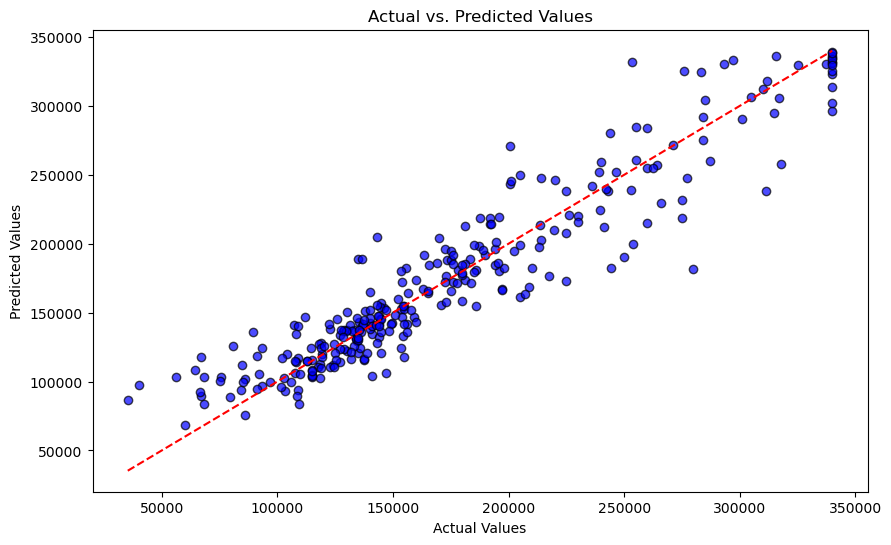

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_RF, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


###  Interpretation of the Plots

Actual vs. Predicted Plot: Helps you see how well the predicted values match the actual values. The red dashed line represents a perfect prediction.

### Choosing the Best Performing Model

Based on the performance metrics (RMSE, MAE, and R2), the Random Forest model is the best among other models after tuning. The reasons are:

RMSE (Root Mean Squared Error): Lower RMSE indicates better predictive accuracy. The Random Forest model has the lowest RMSE (23,426.85), suggesting it makes smaller errors on average.

MAE (Mean Absolute Error): Like RMSE, a lower MAE is better. The Random Forest model also has the lowest MAE (16,883.95), indicating it predicts closer to the actual values.

ùëÖ2 (Coefficient of Determination): R2 measures the proportion of variance explained by the model. A higher R2 value is better. The Random Forest model has the highest R2 (0.887), indicating it explains the most variance in the data.

Given these metrics, the Random Forest model outperforms the other models in all key areas, making it the best choice


## Testing our model on unseen Data

In [55]:
# Predict the prices using the Random Forest model
predicted_prices = RF.predict(test_unlabelled)

# Add the predictions to the unlabelled dataset
unlabelled_data['SalePrice'] = predicted_prices

# Save the updated dataset to a CSV file
unlabelled_data.to_csv('predicted_prices.csv', index=False)

print("Predicted prices have been added to the unlabeled dataset and saved as 'predicted_prices.csv'.")


Predicted prices have been added to the dataset and saved as 'predicted_prices.csv'.


In [56]:
new_data = pd.read_csv("predicted_prices.csv")

In [57]:
new_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0  11622.0   Pave   Nil      Reg   
1  1462          20       RL         81.0  14267.0   Pave   Nil      IR1   
2  1463          60       RL         74.0  13830.0   Pave   Nil      IR1   
3  1464          60       RL         78.0   9978.0   Pave   Nil      IR1   
4  1465         120       RL         43.0   5005.0   Pave   Nil      IR1   

  LandContour Utilities  ... MoSold YrSold SaleType SaleCondition HouseAge  \
0         Lvl    AllPub  ...      6   2010       WD        Normal       49   
1         Lvl    AllPub  ...      6   2010       WD        Normal       52   
2         Lvl    AllPub  ...      3   2010       WD        Normal       13   
3         Lvl    AllPub  ...      6   2010       WD        Normal       12   
4         HLS    AllPub  ...      1   2010       WD        Normal       18   

  RemodelAge TotalBath  TotalSF  LotFrontageRatio    SalePrice  
0         49       1.0   1778.0          0.006883  217703.1000  
1         52       1.5   2658.0          0.005677  308530.6750  
2         12       2.5   2557.0          0.005351  252100.4000  
3         12       2.5   2530.0          0.007817  257565.3125  
4         18       2.0   2560.0          0.008591  253919.6125  

[5 rows x 86 columns]